In [1]:
import numpy as np
import pandas as pd

# Information about data

1. Load the movies.csv as Pandas DataFrame and obtain information about columns, datatypes and memory footprint. 

2. Summary statistics for numeric columns. 

3. Detect any duplicated rows in the DataFrame and remove them. [Hint: read_csv()]

In [19]:
# load csv into pandas DataFrame
movies = pd.read_csv('movies.csv', index_col='id', low_memory=False)

In [20]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45466 entries, 862 to 461257
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   imdb_id                45449 non-null  object 
 6   original_language      45455 non-null  object 
 7   original_title         45466 non-null  object 
 8   overview               44512 non-null  object 
 9   popularity             45461 non-null  object 
 10  poster_path            45080 non-null  object 
 11  production_companies   45463 non-null  object 
 12  production_countries   45463 non-null  object 
 13  release_date           45379 non-null  object 
 14  revenue                45460 non-null  float64
 15  runt

In [21]:
# compute summary statistics for numeric columns.
movies.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


In [22]:
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
id,,,,,,,,,,,,,,,,,,,,,
862,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
8844,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
15602,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
31357,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
11862,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [24]:
print('Before removing duplicates' , movies.duplicated().sum())

Before removing duplicates 17


In [25]:
movies.duplicated()

id
862       False
8844      False
15602     False
31357     False
11862     False
          ...  
439050    False
111109    False
67758     False
227506    False
461257    False
Length: 45466, dtype: bool

In [26]:
movies = movies[~movies.duplicated()]
print('After removing', movies.duplicated().sum())

After removing 0


## Filtering data

 Filter the movies (title, runtime) longer than 1000 minutes and shorter than 2100 minutes

In [27]:
movies_1hr = movies[(movies['runtime'] > 1000) & (movies['runtime'] < 2100)]
movies_1hr.shape

(3, 23)

In [28]:
movies_1hr

,adult,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
id,,,,,,,,,,,,,,,,,,,,,
142051,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,tt0221300,en,Jazz,A survey of the musical form's history and maj...,1.507756,...,2001-01-09,0.0,1140.0,[],Released,NaN,Jazz,False,5.7,3.0
67493,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",NaN,tt0076993,en,Centennial,The economic and cultural growth of Colorado s...,0.664727,...,1978-10-01,0.0,1256.0,[],Released,NaN,Centennial,False,7.9,8.0
126820,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,tt0108700,en,Baseball,"Chronicles the sport's signature people, place...",0.145073,...,1994-09-18,0.0,1140.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Baseball,False,8.5,4.0


##  Top 10 most popular movies 

In [30]:
# check the NaN values in vote_count column using isnull() function
movies_null_vote_count = movies['vote_count'].isnull()
movies_null_vote_count.sum()

6

In [31]:
# get the rows of df_movies where vote_count is not NaN
movies_ = movies[~movies_null_vote_count] 

In [32]:
# sort df_movies_ by vote_count in descending order and get first 10 rows
movies_ = movies_.sort_values(by = 'vote_count',ascending=False).head(10)
movies_

,adult,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
id,,,,,,,,,,,,,,,,,,,,,
27205,False,NaN,160000000,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",http://inceptionmovie.warnerbros.com/,tt1375666,en,Inception,"Cobb, a skilled thief who commits corporate es...",29.108149,...,2010-07-14,8.255328e+08,148.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Your mind is the scene of the crime.,Inception,False,8.1,14075.0
155,False,"{'id': 263, 'name': 'The Dark Knight Collectio...",185000000,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",http://thedarkknight.warnerbros.com/dvdsite/,tt0468569,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,123.167259,...,2008-07-16,1.004558e+09,152.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Why So Serious?,The Dark Knight,False,8.3,12269.0
19995,False,"{'id': 87096, 'name': 'Avatar Collection', 'po...",237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",185.070892,...,2009-12-10,2.787965e+09,162.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Enter the World of Pandora.,Avatar,False,7.2,12114.0
24428,False,"{'id': 86311, 'name': 'The Avengers Collection...",220000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",http://marvel.com/avengers_movie/,tt0848228,en,The Avengers,When an unexpected enemy emerges and threatens...,89.887648,...,2012-04-25,1.519558e+09,143.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Some assembly required.,The Avengers,False,7.4,12000.0
293660,False,"{'id': 448150, 'name': 'Deadpool Collection', ...",58000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.foxmovies.com/movies/deadpool,tt1431045,en,Deadpool,Deadpool tells the origin story of former Spec...,187.860492,...,2016-02-09,7.831130e+08,108.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Witness the beginning of a happy ending,Deadpool,False,7.4,11444.0
157336,False,NaN,165000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",http://www.interstellarmovie.net/,tt0816692,en,Interstellar,Interstellar chronicles the adventures of a gr...,32.213481,...,2014-11-05,6.751200e+08,169.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Mankind was born on Earth. It was never meant ...,Interstellar,False,8.1,11187.0
68718,False,NaN,100000000,"[{'id': 18, 'name': 'Drama'}, {'id': 37, 'name...",http://unchainedmovie.com/,tt1853728,en,Django Unchained,"With the help of a German bounty hunter, a fre...",19.785025,...,2012-12-25,4.253682e+08,165.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,"Life, liberty and the pursuit of vengeance.",Django Unchained,False,7.8,10297.0
118340,False,"{'id': 284433, 'name': 'Guardians of the Galax...",170000000,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",http://marvel.com/guardians,tt2015381,en,Guardians of the Galaxy,"Light years from Earth, 26 years after being a...",53.291601,...,2014-07-30,7.733286e+08,121.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,All heroes start somewhere.,Guardians of the Galaxy,False,7.9,10014.0
550,False,NaN,63000000,"[{'id': 18, 'name': 'Drama'}]",http://www.foxmovies.com/movies/fight-club,tt0137523,en,Fight Club,A ticking-time-bomb insomniac and a slippery s...,63.869599,...,1999-10-15,1.008538e+08,139.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Mischief. Mayhem. Soap.,Fight Club,False,8.3,9678.0


In [33]:
# get the title, vote_count and release_date columns
movies_[['title', 'vote_count', 'release_date']]

,title,vote_count,release_date
id,,,
27205,Inception,14075.0,2010-07-14
155,The Dark Knight,12269.0,2008-07-16
19995,Avatar,12114.0,2009-12-10
24428,The Avengers,12000.0,2012-04-25
293660,Deadpool,11444.0,2016-02-09
157336,Interstellar,11187.0,2014-11-05
68718,Django Unchained,10297.0,2012-12-25
118340,Guardians of the Galaxy,10014.0,2014-07-30
550,Fight Club,9678.0,1999-10-15


In [34]:
# Another way
movies[~movies['vote_count'].isnull()].sort_values(by='vote_count', ascending=False).head(10)[['title', 'vote_count', 'release_date']]

,title,vote_count,release_date
id,,,
27205,Inception,14075.0,2010-07-14
155,The Dark Knight,12269.0,2008-07-16
19995,Avatar,12114.0,2009-12-10
24428,The Avengers,12000.0,2012-04-25
293660,Deadpool,11444.0,2016-02-09
157336,Interstellar,11187.0,2014-11-05
68718,Django Unchained,10297.0,2012-12-25
118340,Guardians of the Galaxy,10014.0,2014-07-30
550,Fight Club,9678.0,1999-10-15


## The number of movies released in each year 

In [35]:
# check the NaN values in release_date column using isnull() function
movies_ =  movies[~movies['release_date'].isnull()]

In [36]:
# use pd.to_datetime() to convert the datatype of release_date to datatime
# suppress warning 
# pd.options.mode.chained_assignment = None 
# corece value of errors parameter will put NaN for the release_date values that cannot be converetd to datetime
# df_movies_['release_date_'] = pd.to_datetime(df_movies_['release_date'], errors='coerce')
movies_.loc[:, 'release_date_'] = pd.to_datetime(movies_['release_date'], errors='coerce')

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [37]:
# use dt property of release_date_ column to access year values and use value_count() 
ts_movies = movies_["release_date_"].dt.year.value_counts().sort_index()

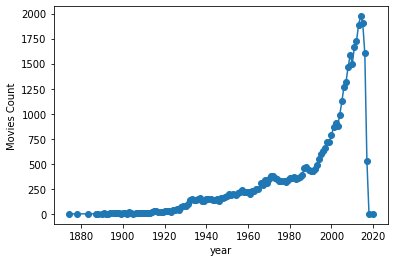

In [38]:
ax = ts_movies.plot(marker='o')

ax.set_ylabel('Movies Count');

ax.set_xlabel('year');